In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit

In [30]:
def sine(x, A, B, C, D):
    # return A * np.sin(B * np.radians(x) + C) + D
    return A*(np.cos(B * np.radians(x) + C))**2 + D

def sine_fit(x, y, inital_guess):
    # Initial guess for the parameters [A, B, C, D]
    # initial_guess = [2, 1.5, 0, 0]

    # Perform the curve fitting
    params, covariance = curve_fit(sine, x, y, p0=inital_guess, sigma=np.zeros(x.size)+0.1)
    print(covariance)

    # Extract the fitted parameters
    A_fit, B_fit, C_fit, D_fit = params

    # print(f"Fitted parameters: A={A_fit}, B={B_fit}, C={C_fit}, D={D_fit}")
    # print(f"Fitted parameters: {A_fit}*sin({B_fit}x + {C_fit}) + {D_fit}")
    print(f"Fitted parameters: {A_fit}*cos^2({B_fit}x + {C_fit}) + {D_fit}")
    # Generate y values using the fitted parameters
    xfit = np.arange(np.min(x), np.max(x), 0.1)
    yfit = sine(xfit, A_fit, B_fit, C_fit, D_fit)
    return xfit, yfit

In [29]:
def straight(x, M, C):
    return M*x + C

def straight_fit(x, y):
    # Perform the curve fitting
    params, covariance = curve_fit(straight, x, y, sigma=np.zeros(x.size)+0.1)
    print(covariance)
    # Extract the fitted parameters
    M_fit, C_fit = params

    # print(f"Fitted parameters: A={A_fit}, B={B_fit}, C={C_fit}, D={D_fit}")
    print(f"Fitted parameters: {M_fit}*x + {C_fit}")
    # Generate y values using the fitted parameters
    xfit = np.arange(np.min(x), np.max(x), 0.01)
    yfit = straight(xfit, M_fit, C_fit)
    return xfit, yfit

## linear

In [4]:
df1 = pd.read_csv('a.csv')
theta1 = np.array(df1['analyser_corr'])
v1 = np.array(df1['voltage_corr'])

[[ 4.10634870e-02 -4.68694266e-06 -1.34039323e-05 -1.92641488e-02]
 [-4.68694266e-06  4.68617293e-07 -1.22030872e-06 -1.78702681e-05]
 [-1.34039323e-05 -1.22030872e-06  4.11507391e-06  6.02692403e-05]
 [-1.92641488e-02 -1.78702681e-05  6.02692403e-05  1.67248303e-02]]
Fitted parameters: 152.16901012627977*cos^2(1.0019658096381634x + 0.008699106089432246) + 0.09630438022201851


Text(0.5, 1.0, 'V vs. $\\theta$ plot for Table 1')

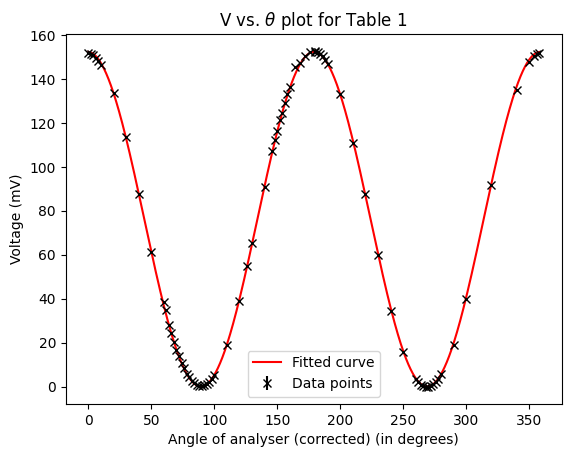

In [31]:
plt.errorbar(theta1, v1, yerr=0.1, fmt='kx', label='Data points')
# xfit1, yfit1 = sine_fit(theta1, v1, inital_guess=[80, 2, np.pi/2, 80])
xfit1, yfit1 = sine_fit(theta1, v1, inital_guess=[160, 1, 0, 0])
plt.plot(xfit1, yfit1, 'r', label='Fitted curve')
plt.xlabel(r'Angle of analyser (corrected) (in degrees)')
plt.ylabel('Voltage (mV)')
plt.legend()
plt.title(r'V vs. $\theta$ plot for Table 1')

[[ 0.15045568 -0.07109886]
 [-0.07109886  0.05891945]]
Fitted parameters: 152.5767749752506*x + -0.037339796050538804


Text(0.5, 1.0, "V vs. $\\cos^2$($\\theta$) plot for Table 1\nto verify Malu's Law")

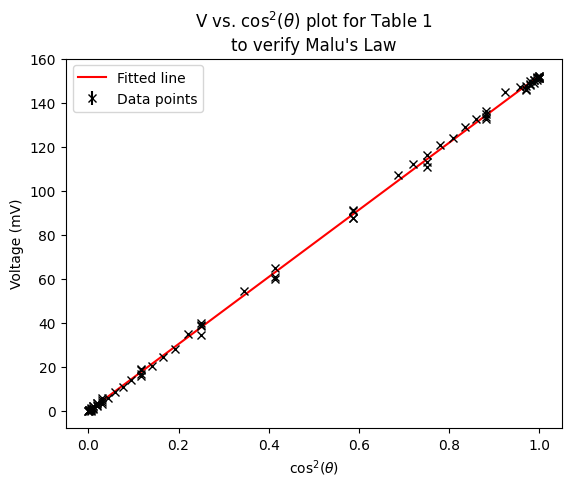

In [32]:
# malu's law
cos2theta = np.power(np.cos(np.radians(theta1)), 2)
plt.errorbar(cos2theta, v1, yerr=0.1, fmt='kx', label='Data points')
xfit11, yfit11 = straight_fit(cos2theta, v1)
plt.plot(xfit11, yfit11, 'r', label='Fitted line')
plt.xlabel(r'$\cos^2(\theta)$')
plt.ylabel('Voltage (mV)')
plt.legend()
plt.title(r'V vs. $\cos^2$($\theta$) plot for Table 1'+'\nto verify Malu\'s Law')

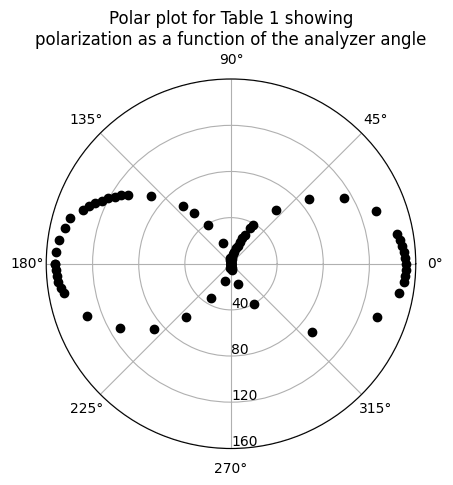

In [7]:
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.plot(np.radians(theta1), v1, 'ko')
ax.set_rticks([40, 80, 120, 160])  # Less radial ticks
ax.set_rlabel_position(-90)  # Move radial labels away from plotted line
ax.grid(True)
plt.title('Polar plot for Table 1 showing\npolarization as a function of the analyzer angle')
plt.show()

## linear but rotated

In [8]:
df2 = pd.read_csv('b.csv')
theta2 = np.array(df2['analyser_corr'])
v2 = np.array(df2['voltage_corr'])

[[ 4.16649820e+00 -4.88206905e-04  3.81052241e-03 -1.94232945e+00]
 [-4.88206905e-04  2.38145188e-05 -6.81870195e-05  1.30881503e-03]
 [ 3.81052241e-03 -6.81870195e-05  2.65532476e-04 -4.64917050e-03]
 [-1.94232945e+00  1.30881503e-03 -4.64917050e-03  1.66562488e+00]]
Fitted parameters: 186.41477560452*cos^2(1.0229773678868934x + 1.6710467022161464) + 4.626148388658726


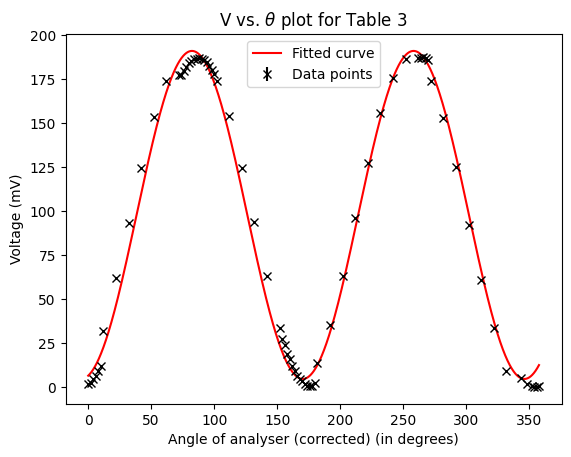

In [35]:
plt.errorbar(theta2, v2, yerr=0.1, fmt='kx', label='Data points')
xfit2, yfit2 = sine_fit(theta2, v2, inital_guess=[186, 1, np.pi/2, 0])
plt.plot(xfit2, yfit2, 'r', label='Fitted curve')
plt.xlabel(r'Angle of analyser (corrected) (in degrees)')
plt.ylabel('Voltage (mV)')
plt.title(r'V vs. $\theta$ plot for Table 3')
plt.legend()

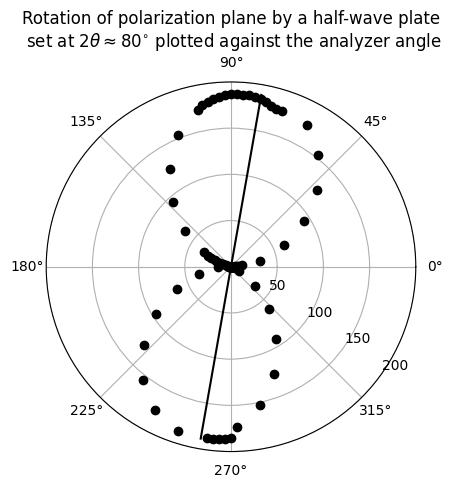

In [10]:
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
# cos2theta2 = np.power(np.cos(np.radians(theta2)), 2)
ax.plot(np.radians(theta2), v2, 'ko')
# ax.plot(yfit11, xfit11, 'r')
# ax.set_rmax(1.1)
phi = np.radians(80)
ax.vlines(phi, 0, 190, 'k')
ax.vlines(np.pi+phi, 0, 190, 'k')
ax.set_rlabel_position(-35)  # Move radial labels away from plotted line
ax.set_rticks([50, 100, 150, 200])  # Less radial ticks
ax.grid(True)
plt.title('Rotation of polarization plane by a half-wave plate\n set at '+ r'$2\theta\approx 80^{\circ}$' +' plotted against the analyzer angle')
plt.show()

## elliptical

In [11]:
df3 = pd.read_csv('c.csv')
theta3 = np.abs(np.array(df3['analyser_corr']))
v3 = np.array(df3['voltage_corr'])

[[ 2.73163915e-01  1.63407577e-04 -4.18468918e-04 -1.65989140e-01]
 [ 1.63407577e-04  2.27014316e-05 -6.90396648e-05 -3.98160442e-04]
 [-4.18468918e-04 -6.90396648e-05  2.77836242e-04  1.35219832e-03]
 [-1.65989140e-01 -3.98160442e-04  1.35219832e-03  1.32905725e-01]]
Fitted parameters: 27.336559041241802*cos^2(1.0390123851163648x + 0.4977664894776836) + 78.75602963670366


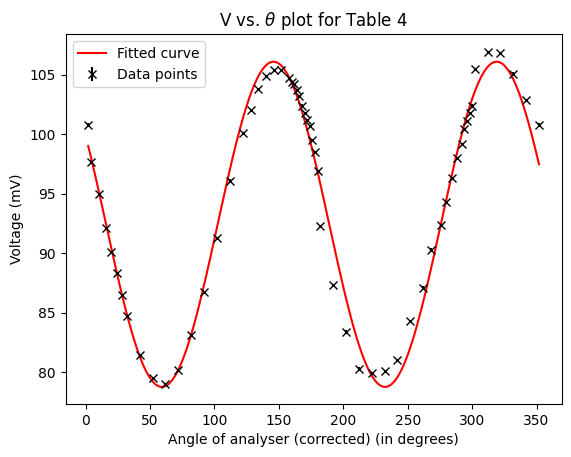

In [36]:
plt.errorbar(theta3, v3, yerr=0.1, fmt='kx', label='Data points')
# xfit3, yfit3 = sine_fit(theta3, v3, inital_guess=[15, 2, 1.5, 90])
xfit3, yfit3 = sine_fit(theta3, v3, inital_guess=[25, 1, 0, 80])
plt.plot(xfit3, yfit3, 'r', label='Fitted curve')
plt.xlabel(r'Angle of analyser (corrected) (in degrees)')
plt.ylabel('Voltage (mV)')
plt.title(r'V vs. $\theta$ plot for Table 4')
plt.legend()

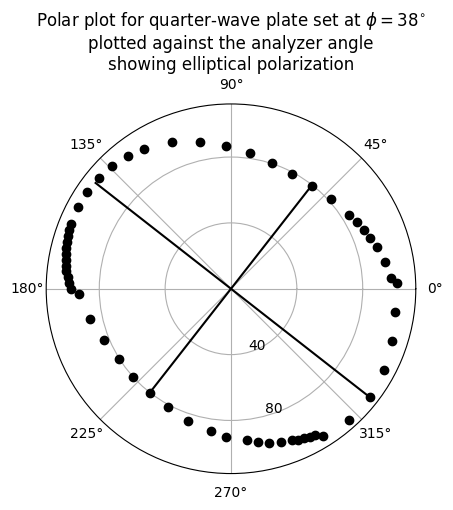

In [13]:
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
# cos2theta2 = np.power(np.cos(np.radians(theta2)), 2)
ax.plot(np.radians(theta3), v3, 'ko')
# ax.plot(yfit11, xfit11, 'r')
ax.set_rmax(140)
ax.set_rticks([40, 80, 120])  # Less radial ticks
ax.set_rlabel_position(-75)  # Move radial labels away from plotted line
ax.grid(True)
phi = np.radians(322)
ax.vlines(phi, 0, 105, 'k')
ax.vlines(np.pi+phi, 0, 105, 'k')
ax.vlines(np.pi/2+phi, 0, 80, 'k')
ax.vlines(1.5*np.pi+phi, 0, 80, 'k')
plt.title('Polar plot for quarter-wave plate set at '+ r'$\phi=38^{\circ}$' +'\nplotted against the analyzer angle\nshowing elliptical polarization')
plt.show()

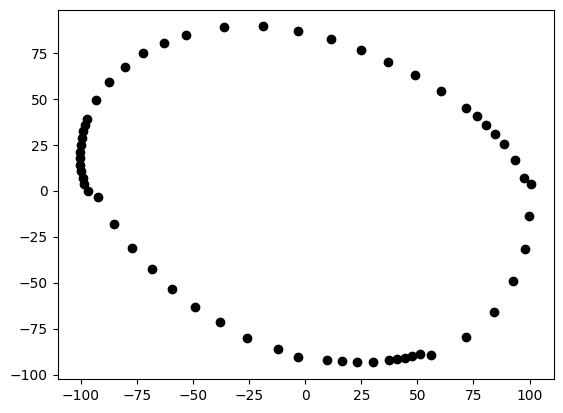

In [15]:
# fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
# cos2theta2 = np.power(np.cos(np.radians(theta2)), 2)
thetas3 = np.radians(theta3)
plt.plot(v3*np.cos(thetas3), v3*np.sin(thetas3), 'ko')
def cone(x, y, A, B, C, D, e, f):
    return A*x**2 + B*y**2 + C*x*y + D*x + e*y + f

params, covariance = curve_fit(cone, x, y, sigma=np.zeros(x.size)+0.1)
# Extract the fitted parameters
A_fit, B_fit, C_fit, D_fit, e, f = params

# print(f"Fitted parameters: A={A_fit}, B={B_fit}, C={C_fit}, D={D_fit}")
# print(f"Fitted parameters: {A_fit}*sin({B_fit}x + {C_fit}) + {D_fit}")
# Generate y values using the fitted parameters
xfit = np.arange(-100, 100, 1)
yfit = sine(xfit, A_fit, B_fit, C_fit, D_fit)
return xfit, yfit
# # ax.plot(yfit11, xfit11, 'r')
# ax.set_rmax(140)
# ax.set_rticks([40, 80, 120])  # Less radial ticks
# ax.set_rlabel_position(-75)  # Move radial labels away from plotted line
# ax.grid(True)
# phi = np.radians(322)
# ax.vlines(phi, 0, 105, 'k')
# ax.vlines(np.pi+phi, 0, 105, 'k')
# ax.vlines(np.pi/2+phi, 0, 80, 'k')
# ax.vlines(1.5*np.pi+phi, 0, 80, 'k')
# plt.title('Polar plot for quarter-wave plate set at '+ r'$\phi=38^{\circ}$' +'\nplotted against the analyzer angle\nshowing elliptical polarization')
# plt.show()

In [19]:
a = v3*np.cos(thetas3)
b = v3*np.sin(thetas3)
c = [(a[i], b[i]) for i in range(a.size)]
c

[(99.81902132915027, -14.028648576774641),
 (97.8637155267713, -31.797848721182117),
 (92.79779200947323, -49.341461248797124),
 (84.1595484851979, -65.7526455647803),
 (71.5300618197619, -79.44218184353349),
 (55.906482376603094, -89.46907414450295),
 (51.20000000000002, -88.68100134752652),
 (47.79220509160364, -89.88406495303877),
 (44.31932294037572, -90.86807808084578),
 (40.8363589648103, -91.71996394731715),
 (37.160974066858465, -91.97663837302531),
 (30.283665448744827, -93.20353859692506),
 (23.297078546247974, -93.43947844037847),
 (16.375023153991496, -92.86737110905122),
 (9.658430005931136, -91.89382313202847),
 (-3.1514245522358184, -90.24499167982434),
 (-12.121977093621732, -86.25234878739076),
 (-26.05013262580808, -80.17406432368143),
 (-38.02719658565715, -71.51875502157309),
 (-49.31448417358521, -63.11966136389844),
 (-59.3772715556438, -53.463535448072776),
 (-68.09826212136102, -42.55251691792634),
 (-77.32713347087008, -31.242189890887065),
 (-85.39228554406122